In [2]:

import pandas as pd
import numpy as np
#import seaborn as sns
import json 
import matplotlib.pyplot as plt
import text_analysis as ta
import json
#import statistics
#from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Emociones Rafael Correa

In [3]:

a_file = open("tweetCorreaIngles.json", "r")
tweets_Correa = json.load(a_file)

In [64]:
#Abre el archivo que contiene los tweets de Correa y lo almacena como un diccionario

a_file2 = open("tweetCorrea.json", "r")
tweets_Correa2 = json.load(a_file2)

In [4]:
df_Correa = ta.df_tweets(tweets_Correa)

In [65]:
df_Correa2 = ta.df_tweets(tweets_Correa2)

In [67]:
df_Correa2["Tweet_Limpio"] = df_Correa2.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

In [55]:
df_Correa["Tweet_Limpio"] = df_Correa.Tweet.apply(lambda x: ta.limpieza_texto_en(x)) 

df_Correa["Simple_Positivo"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.simple_pos(x))

df_Correa["Simple_Negativo"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.simple_neg(x))

df_Correa["Simple_Polaridad"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.simple_pol(x))

df_Correa["NRC_Ira"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"anger"))

df_Correa["NRC_Anticipacion"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"anticipation"))

df_Correa["NRC_Disgusto"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"disgust"))

df_Correa["NRC_Miedo"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"fear"))

df_Correa["NRC_Alegria"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"joy"))

df_Correa["NRC_Tristeza"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"sadness"))

df_Correa["NRC_Sorpresa"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"surprise"))

df_Correa["NRC_Confianza"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"trust"))

df_Correa["NRC_Negativo"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"negative"))

df_Correa["NRC_Positivo"] = df_Correa.Tweet_Limpio.apply(lambda x: ta.sentiment_NRC(x,"positive"))

df_Correa["Vader_neg"] = df_Correa.Tweet.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["neg"])

df_Correa["Vader_neu"] = df_Correa.Tweet.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["neu"])

df_Correa["Vader_pos"] = df_Correa.Tweet.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["pos"])

df_Correa["Vader_compound"] = df_Correa.Tweet.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])

In [56]:
df_Correa["Simple_mayor"] = df_Correa[["Simple_Positivo","Simple_Negativo"]].idxmax(axis=1)

df_Correa["NRC_mayor"] = df_Correa[["NRC_Negativo","NRC_Positivo"]].idxmax(axis=1)

df_Correa["NRC_Sentimiento"] = df_Correa[["NRC_Ira","NRC_Anticipacion","NRC_Disgusto","NRC_Miedo","NRC_Alegria",
          "NRC_Tristeza","NRC_Sorpresa","NRC_Confianza"]].idxmax(axis=1)

df_Correa["Vader_Polaridad"] = np.where(df_Correa.Vader_compuesto<0,'Negativo',
                                       np.where(df_Correa.Vader_compuesto>0,'Positivo','Neutro'))

In [68]:
df_Correa["Tweet_es"] = df_Correa2["Tweet_Limpio"]

# Nubes de palabras de emociones

In [72]:
confianza_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Confianza"].Tweet_es:
    confianza_tweets+=i

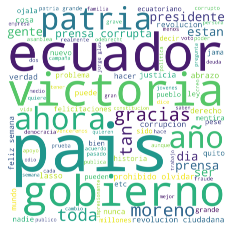

In [74]:
ta.nube_palabras(confianza_tweets,n_palabras=100)

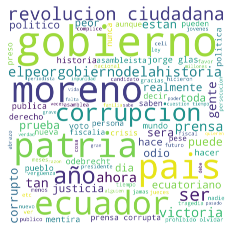

In [75]:
miedo_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Miedo"].Tweet_es:
    miedo_tweets+=i

ta.nube_palabras(miedo_tweets,n_palabras=100)

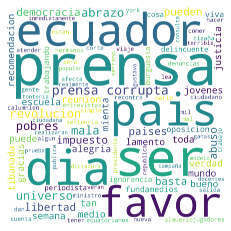

In [76]:
ira_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Ira"].Tweet_es:
    ira_tweets+=i

ta.nube_palabras(ira_tweets,n_palabras=100)

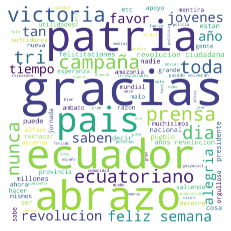

In [77]:
Anticipacion_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Anticipacion"].Tweet_es:
    Anticipacion_tweets+=i

ta.nube_palabras(Anticipacion_tweets,n_palabras=100)

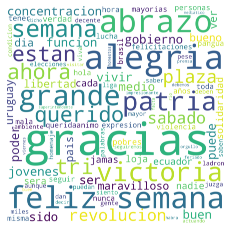

In [78]:
Alegria_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Alegria"].Tweet_es:
    Alegria_tweets+=i

ta.nube_palabras(Alegria_tweets,n_palabras=100)

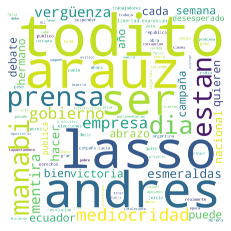

In [79]:
Tristeza_tweets = ""
for i in df_Correa[df_Correa.NRC_Sentimiento=="NRC_Tristeza"].Tweet_es:
    Tristeza_tweets+=i

ta.nube_palabras(Tristeza_tweets,n_palabras=100)

In [57]:
df_Correa[["Simple_Positivo","Simple_Negativo"]].idxmax(axis=1).value_counts()

Simple_Negativo    81
Simple_Positivo    36
dtype: int64

In [58]:
df_Correa[["NRC_Negativo","NRC_Positivo"]].idxmax(axis=1).value_counts()

NRC_Positivo    79
NRC_Negativo    38
dtype: int64

In [63]:
df_Correa["Vader_Polaridad"].value_counts()

Positivo    62
Negativo    55
Name: Vader_Polaridad, dtype: int64

In [59]:
df_Correa[["NRC_Ira","NRC_Anticipacion","NRC_Disgusto","NRC_Miedo","NRC_Alegria",
          "NRC_Tristeza","NRC_Sorpresa","NRC_Confianza"]].idxmax(axis=1).value_counts()

NRC_Confianza       79
NRC_Miedo           22
NRC_Anticipacion     6
NRC_Alegria          4
NRC_Ira              3
NRC_Tristeza         3
dtype: int64

In [37]:
for i in ta.dict_sentimientos.keys():
    print(i, len(ta.dict_sentimientos[i]))

anger 1247
anticipation 839
disgust 1058
fear 1476
joy 689
negative 3324
positive 2312
sadness 1191
surprise 534
trust 1231


In [38]:
len(ta.neg_word_list)

4783

In [39]:
len(ta.pos_word_list)

2006

In [44]:
df_Correa["Vader_compuesto"] = df_Correa.Tweet.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])

In [61]:
df_Correa.drop(['Tweet', 'Tweet_Limpio'], axis=1).to_csv("Correa_Sentimiento.csv")

# Por palabra

In [4]:
#Abre el archivo que contiene los tweets de Correa y lo almacena como un diccionario

a_file = open("tweetCorrea.json", "r")
tweets_Correa = json.load(a_file)

In [5]:
todos_tweets = []
for i in tweets_Correa.keys():
    todos_tweets += tweets_Correa[i]

In [6]:
a_file = open("tweetCorreaIngles.json", "r")
tweets_Correa_ingles = json.load(a_file)

In [7]:
todos_tweets_ingles = []
for i in tweets_Correa_ingles.keys():
    todos_tweets_ingles += tweets_Correa_ingles[i]

In [8]:
tweets_ingles_todos = pd.DataFrame({"tweets":todos_tweets_ingles})

In [9]:
tweets_ingles_todos["tweets"] = tweets_ingles_todos["tweets"] .apply(lambda x: x.lower())

In [10]:
tweets_ingles_todos["tweets"] = tweets_ingles_todos["tweets"].apply(lambda x: x.replace("dark","moreno"))

In [11]:
ta.palabra_sentimiento(tweets_ingles_todos, "tweets", "glass")

{'neg': 0.258, 'neu': 0.591, 'pos': 0.151, 'compound': -0.5975}

# Comparacion con Lenin Moreno

In [12]:
a_file = open("tweetCorreaIngles.json", "r")
tweets_Correa_ingles = json.load(a_file)

a_file = open("tweetLeninIngles.json", "r")
tweets_Moreno_ingles = json.load(a_file)


In [20]:
df_Moreno1 = ta.df_tweets(tweets_Moreno_ingles)
df_Correa1 = ta.df_tweets(tweets_Correa_ingles)

In [21]:
df_Moreno = pd.DataFrame({"Tweet_Moreno": df_Moreno1.Tweet,"Fecha":df_Moreno1.Fecha})
df_Correa = pd.DataFrame({"Tweet_Correa": df_Correa1.Tweet,"Fecha":df_Correa1.Fecha})

In [22]:
df_Moreno_Correa = df_Moreno.merge(df_Correa, how='inner',left_on='Fecha', right_on='Fecha')

In [24]:
df_Moreno_Correa["Emocion_Moreno"] = df_Moreno_Correa.Tweet_Moreno.apply(lambda x: ta.max_emotion(x))

In [25]:
df_Moreno_Correa["Emocion_Correa"] = df_Moreno_Correa.Tweet_Correa.apply(lambda x: ta.max_emotion(x))

In [26]:
df_Moreno_Correa

,Tweet_Moreno,Fecha,Tweet_Correa,Emocion_Moreno,Emocion_Correa
0,Don't miss tonight's interview. Analysis and p...,2016-10-01,times change ministers defense ecuador peru si...,trust,trust
1,"I will do it with affection, respect, honesty,...",2016-11-01,Remember the president cameras will have to pa...,trust,trust
2,"Congratulations to Quito, the city in the midd...",2016-12-01,bright young peopleCongratulations barcelona d...,trust,trust
3,Unity will advance us even further! The future...,2017-01-01,stain victoryJorge glas asked for a license in...,trust,trust
4,Ecuador has 5 star products. Gold has 3: the b...,2017-02-01,Dalito vanidad believes tweet just invited to ...,trust,trust
5,Now for the best. We are going to win with you...,2017-03-01,Ecuadorians honored women repudiated bank holi...,trust,trust
6,Long live Ecuador! Welcome fighters of peace a...,2017-04-01,President song sung extraordinary artists home...,trust,trust
7,Great human beings: Mons. Eugenio Arellano and...,2017-05-01,invention printing press freedom press will ow...,trust,trust
8,I had the pleasure of having lunch with childr...,2017-06-01,security justice attracts private investment f...,fear,fear
9,Abstinence syndrome:The key is to identify the...,2017-07-01,despite human smallness we will continue to sp...,trust,trust


In [28]:
df_Moreno_Correa["Polaridad_Moreno"] = df_Moreno_Correa.Tweet_Moreno.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])
df_Moreno_Correa["Polaridad_Correa"] = df_Moreno_Correa.Tweet_Correa.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])

In [30]:
df_Moreno_Correa.drop(['Tweet_Moreno', 'Tweet_Correa'], axis=1).to_csv("df_Moreno_Correa_sentimiento.csv")

# Comparacion con Lasso y Arauz

In [4]:
a_file = open("tweetCorreaIngles.json", "r")
tweets_Correa_ingles = json.load(a_file)

a_file = open("tweetLassoIngles.json", "r")
tweets_Lasso_ingles = json.load(a_file)

a_file = open("tweetArauzIngles.json", "r")
tweets_Arauz_ingles = json.load(a_file)


In [5]:
df_Arauz1 = ta.df_tweets(tweets_Arauz_ingles)
df_Lasso1 = ta.df_tweets(tweets_Lasso_ingles)
df_Correa1 = ta.df_tweets(tweets_Correa_ingles)

In [6]:
df_Arauz = pd.DataFrame({"Tweet_Arauz": df_Arauz1.Tweet,"Fecha":df_Arauz1.Fecha})
df_Lasso = pd.DataFrame({"Tweet_Lasso": df_Lasso1.Tweet,"Fecha":df_Lasso1.Fecha})
df_Correa = pd.DataFrame({"Tweet_Correa": df_Correa1.Tweet,"Fecha":df_Correa1.Fecha})

In [7]:
df_Arauz_Correa = df_Arauz.merge(df_Correa, how='inner',left_on='Fecha', right_on='Fecha')

In [8]:
df_Arauz_Correa_Lasso = df_Arauz_Correa.merge(df_Lasso, how='inner',left_on='Fecha', right_on='Fecha')

In [9]:
df_Arauz_Correa_Lasso["Emocion_Arauz"] = df_Arauz_Correa_Lasso.Tweet_Arauz.apply(lambda x: ta.max_emotion(x))
df_Arauz_Correa_Lasso["Emocion_Lasso"] = df_Arauz_Correa_Lasso.Tweet_Lasso.apply(lambda x: ta.max_emotion(x))
df_Arauz_Correa_Lasso["Emocion_Correa"] = df_Arauz_Correa_Lasso.Tweet_Correa.apply(lambda x: ta.max_emotion(x))

In [10]:
df_Arauz_Correa_Lasso

,Tweet_Arauz,Fecha,Tweet_Correa,Tweet_Lasso,Emocion_Arauz,Emocion_Lasso,Emocion_Correa
0,"With the exchange of bank information, $ 11 tr...",2020-07-01,"homeland returns, joy, prosperity, hopeThe day...",In the first # 100 minutes we will arrive with...,trust,trust,fear
1,When the legal restructuring of the bonds is c...,2020-08-01,academy church honest press judges political e...,Let us vote for whoever leaves the money in th...,trust,trust,fear
2,ARecuperarElFuturo Message to the youth of Ecu...,2020-09-01,Every few are present they say click pollster ...,A good administrator invests in the future of ...,trust,trust,trust
3,Long live the warrior people of Guayaquil! 200...,2020-10-01,Lies pseudo journalist lawyer ensures fast uni...,ALLIANCE FOR PROSPERITY We are united by chang...,trust,trust,fear
4,Thank you brothers and sisters of Bolivia for ...,2020-11-01,they put tape there must be responsible irresp...,"This fight is for you, for your family, for yo...",trust,trust,trust
5,Thanks to everyone who was vigilant and mobili...,2020-12-01,venezuela electoral observer visit vice presid...,"For sure, there will be investment and more em...",trust,trust,trust
6,The banker has been financing his campaign wit...,2021-01-01,we will win allhonorable members of the commit...,NO CORRUPTION AND INEFFICIENCY!We will rescue ...,trust,trust,sadness
7,"Love, hope, the future wonWith my grandmothers...",2021-02-01,let win everythingcitizen revolution sweeps eu...,VOTE ALL 21-6 FOR LASSO PRESIDENT!Your vote wi...,trust,trust,trust
8,Young people have asked me about educational c...,2021-03-01,it seems like a national police paradeThey are...,Ranchers require attention and support. That i...,trust,trust,trust
9,In the trade union center of the Ecuadorian La...,2021-04-01,really outrageous lasso morenoserious black la...,"We need to find ourselves UNITED, respecting o...",trust,trust,trust


In [11]:
df_Arauz_Correa_Lasso["Polaridad_Arauz"] = df_Arauz_Correa_Lasso.Tweet_Arauz.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])
df_Arauz_Correa_Lasso["Polaridad_Lasso"] = df_Arauz_Correa_Lasso.Tweet_Lasso.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])
df_Arauz_Correa_Lasso["Polaridad_Correa"] = df_Arauz_Correa_Lasso.Tweet_Correa.apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)["compound"])

In [12]:
df_Arauz_Correa_Lasso.drop(['Tweet_Arauz',"Tweet_Lasso", 'Tweet_Correa'], axis=1).to_csv("df_Arauz_Correa_Lasso_sentimiento.csv")

In [15]:
a_file = open("tweetarauz.json", "r")
tweets_Arauz = json.load(a_file)
df_Arauz = ta.df_tweets(tweets_Arauz)
df_Arauz["Tweet_Limpios"] = df_Arauz.Tweet.apply(lambda x: ta.limpieza_texto(x)) 

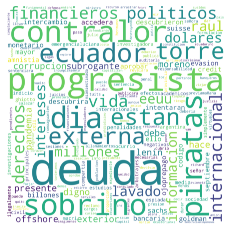

In [27]:
ta.nube_palabras(df_Arauz[df_Arauz.N_mes == 7].Tweet_Limpios[0],n_palabras=200)

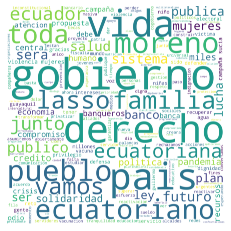

In [30]:
ta.nube_palabras(df_Arauz[df_Arauz.N_mes == 3].Tweet_Limpios.iloc[0],n_palabras=200)